In [49]:
from hypers import Params

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

params = Params.read_hyperparameters("parameters.json")

{'input': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/spam/spamMissing_20.csv', 'output': 'spamImputed_20', 'ref': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/spam/spam.csv', 'output_folder': '/home/leandrosobral/LeandroSobralThesis/ProtoGain/spam/results/', 'num_iterations': 2000, 'batch_size': 128, 'alpha': 10, 'miss_rate': 0.2, 'hint_rate': 0.9, 'train_ratio': 0.8, 'lr_D': 0.001, 'lr_G': 0.001, 'num_runs': 50}


In [51]:
# Load the CSV files for Breast

dataset = "breast"
folder = "~/LeandroSobralThesis/ProtoGain/"

loss_D = {}
loss_G = {}
loss_MSE_train = {}
loss_MSE_test = {}
cpu = {}
ram_percentage = {}
ram = {}

MSE_final = {}

run_time = {}

loss_D = pd.read_csv(folder + f"results/lossD.csv").values.flatten()
loss_G = pd.read_csv(folder + f"results/lossG.csv").values.flatten()

loss_MSE_train = pd.read_csv(folder + f"results/lossMSE_train.csv").values.flatten()
loss_MSE_test = pd.read_csv(folder + f"results/lossMSE_test.csv").values.flatten()

cpu = pd.read_csv(folder + f"results/cpu.csv").values.flatten()
ram_percentage = pd.read_csv(folder + f"results/ram_percentage.csv").values.flatten()
ram = pd.read_csv(folder + f"results/ram.csv").values.flatten()
MSE_final = loss_MSE_test[-1]

run_time = pd.read_csv(folder + f"results/run_time.csv").values.flatten()

print(MSE_final, run_time)

0.0046002854987292 [30.14181256 29.22797966]


In [50]:
# Load the CSV files for Spam

dataset = "spam"
folder = "~/LeandroSobralThesis/ProtoGain/" + dataset + "/"

loss_D = {}
loss_G = {}
loss_MSE_train = {}
loss_MSE_test = {}
cpu = {}
ram_percentage = {}
ram = {}

MSE_final = {}

run_time = {}

loss_D = pd.read_csv(folder + f"results/lossD.csv").values.flatten()
loss_G = pd.read_csv(folder + f"results/lossG.csv").values.flatten()

loss_MSE_train = pd.read_csv(folder + f"results/lossMSE_train.csv").values.flatten()
loss_MSE_test = pd.read_csv(folder + f"results/lossMSE_test.csv").values.flatten()

cpu = pd.read_csv(folder + f"results/cpu.csv").values.flatten()
ram_percentage = pd.read_csv(folder + f"results/ram_percentage.csv").values.flatten()
ram = pd.read_csv(folder + f"results/ram.csv").values.flatten()
MSE_final = loss_MSE_test[-1]

run_time = pd.read_csv(folder + f"results/run_time.csv").values.flatten()

print(MSE_final, run_time)

0.002463199049515 [38.5696249]


In [3]:
# Load the CSV files for Credit

dataset = "credit"
myFolder = "~/LeandroSobralThesis/credit/"
gainFolder = "~/LeandroSobralThesis/GAIN/credit/"

train_samples = [
    24000,
    21600,
    19200,
    16800,
    14400,
    12000,
    10800,
    9600,
    8400,
    7200,
    6000,
    4800,
    3600,
    2400,
]
test_samples = 6000  # credit size


my_loss_D = {}
my_loss_G = {}
my_loss_MSE_test_testsplit = {}
my_loss_MSE_train = {}
my_loss_MSE_test = {}
my_loss_MSE_train_testsplit = {}
my_cpu = {}
my_ram_percentage = {}
my_ram = {}

my_MSE_final = {}

my_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        my_loss_D[samples, i] = pd.read_csv(
            myFolder + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        my_loss_G[samples, i] = pd.read_csv(
            myFolder + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )

        my_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                myFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )
        my_loss_MSE_train[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_test[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            myFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_cpu[samples, i] = pd.read_csv(
            myFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram_percentage[samples, i] = pd.read_csv(
            myFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_ram[samples, i] = pd.read_csv(
            myFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        my_MSE_final[samples, i] = my_loss_MSE_test_testsplit[samples, i][-1]

    my_run_time[samples] = np.array(
        pd.read_csv(
            myFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()


##########################################################################################################################33
gain_loss_D = {}
gain_loss_G = {}
gain_loss_MSE_test_testsplit = {}
gain_loss_MSE_train = {}
gain_loss_MSE_test = {}
gain_loss_MSE_train_testsplit = {}
gain_cpu = {}
gain_ram_percentage = {}
gain_ram = {}

gain_MSE_final = {}

gain_run_time = {}

for samples in train_samples:

    for i in range(params.num_runs):
        gain_loss_D[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossD_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_G[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossG_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_test_testsplit[samples, i] = np.array(
            pd.read_csv(
                gainFolder
                + f"results/lossMSE_test_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
            )
        )
        gain_loss_MSE_train[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_test[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_test_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_loss_MSE_train_testsplit[samples, i] = pd.read_csv(
            gainFolder
            + f"results/lossMSE_train_testsplit_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_cpu[samples, i] = pd.read_csv(
            gainFolder + f"results/cpu_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_ram_percentage[samples, i] = pd.read_csv(
            gainFolder
            + f"results/ram_percentage_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_ram[samples, i] = pd.read_csv(
            gainFolder + f"results/ram_{int(params.miss_rate * 100)}_{samples}_{i}.csv"
        )
        gain_MSE_final[samples, i] = gain_loss_MSE_test_testsplit[samples, i][-1]

    gain_run_time[samples] = np.array(
        pd.read_csv(
            gainFolder + f"results/run_time_{int(params.miss_rate * 100)}_{samples}.csv"
        )
    ).flatten()

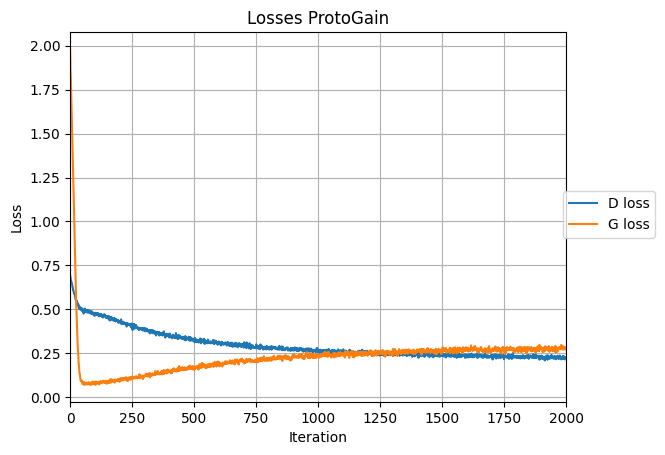

In [40]:
# Plot the D and G losses

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("Loss")
axs.set_xlim(0, xmax)
axs.set_title(f"Losses ProtoGain")


axs.plot(loss_D, label="D loss")
axs.plot(loss_G, label="G loss")
axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()

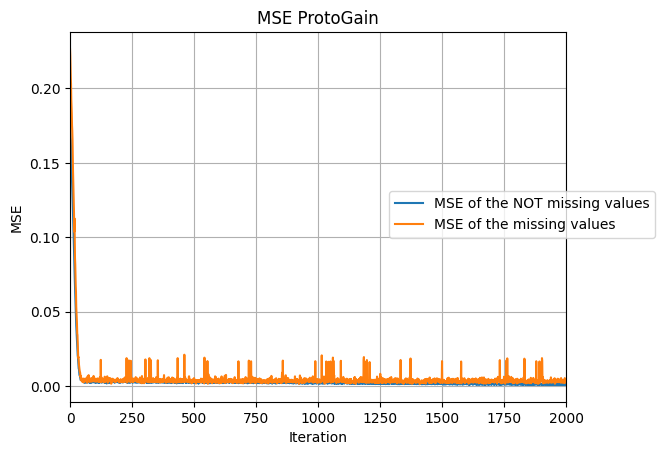

In [41]:
# Plot the MSE

xmax = params.num_iterations

fig, axs = plt.subplots()


axs.set_xlabel("Iteration")
axs.set_ylabel("MSE")
axs.set_xlim(0, xmax)
axs.set_title(f"MSE ProtoGain")


axs.plot(loss_MSE_train, label="MSE of the NOT missing values")
axs.plot(loss_MSE_test, label="MSE of the missing values")
axs.xaxis.grid(True, which="major")
axs.yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()

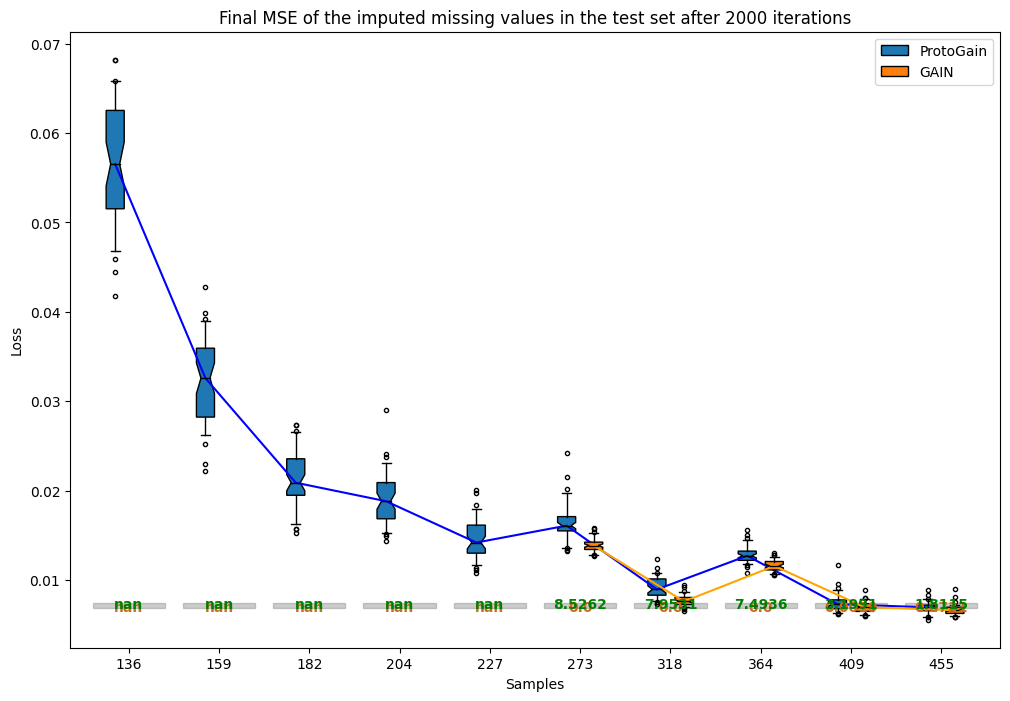

In [3]:
# Final MSE

my_mse_values = {}
gain_mse_values = {}

for samples in train_samples:
    for run in range(params.num_runs):
        my_mse_values[samples] = my_mse_values.get(samples, []) + [
            my_MSE_final[samples, run]
        ]

    my_mse_values[samples] = np.concatenate(my_mse_values[samples])

my_mse_values = dict(reversed(list(my_mse_values.items())))
nb_groups = len(my_mse_values)
space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    my_mse_values.values(),
    positions=np.arange(nb_groups) - space,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

X = []
Y = []
for m in bp1["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="blue")


################################# GAIN ############################################
for samples in train_samples:
    for run in range(params.num_runs):
        gain_mse_values[samples] = gain_mse_values.get(samples, []) + [
            gain_MSE_final[samples, run]
        ]

    gain_mse_values[samples] = np.concatenate(gain_mse_values[samples])

gain_mse_values = dict(reversed(list(gain_mse_values.items())))

# ax[1] = ax1.twinx()
bp2 = ax.boxplot(
    gain_mse_values.values(),
    positions=np.arange(nb_groups) + space,
    boxprops=dict(facecolor="tab:orange"),
    **box_param,
)
# ax.set_xticklabels(mse_values.keys())

X = []
Y = []
for m in bp2["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="orange")


ax.set_xlabel("Samples")
ax.set_ylabel("Loss")
ax.set_title(
    f"Final MSE of the imputed missing values in the test set after {params.num_epochs} iterations"
)
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["ProtoGain", "GAIN"], loc="upper right")
# ax.set_ylim(0.0065, 0.02)

ax.set_xticks(np.arange(nb_groups))
ax.set_xticklabels([f"{key}" for key in gain_mse_values.keys()])

for tick, samples in enumerate(gain_mse_values.keys()):
    res = ttest_ind(my_mse_values[samples], gain_mse_values[samples])
    x = tick
    y = 0.007

    # Draw the square
    ax.add_patch(
        plt.Rectangle((x - 0.4, y - 0.00008), 0.8, 0.0005, color="grey", alpha=0.4)
    )

    # Add the res value inside the square
    ax.text(
        x,
        y,
        str(round(res.pvalue, 4)),
        color="chocolate",
        ha="center",
        va="center",
        weight="bold",
    )
    ax.text(
        x,
        y + 0.00025,
        str(round(res.statistic, 4)),
        color="g",
        ha="center",
        va="center",
        weight="bold",
    )

In [48]:
# Original VS Imputed

xlim = 100000


x = np.linspace(-xlim, xlim, 100)
y = x


df_data = pd.read_csv(params.ref).values

df_missing = pd.read_csv(params.input).values

df_imputed = pd.read_csv(params.output_folder + f"{params.output}.csv").values


zeros = np.where(np.isnan(df_missing))

features = np.arange(len(df_data[0]))

# features = np.array([0, 1])

fig, axs = plt.subplots(len(features), figsize=(8, 130))

for feature in features:

    xmin = df_data[:, feature].min()
    xmax = df_data[:, feature].max()

    ymin = df_imputed[:, feature].min()
    ymax = df_imputed[:, feature].max()

    zeros_0 = []
    for i in range(len(zeros[0])):
        if zeros[1][i] == feature:
            zeros_0.append(zeros[0][i])

    axs[feature].plot(x, y, color="red", linestyle="--")
    axs[feature].scatter(df_data[zeros_0, feature], df_imputed[zeros_0, feature])
    axs[feature].set_xlabel("Original")
    axs[feature].set_ylabel("Imputed")
    axs[feature].set_xlim(xmin * 0.9, xmax * 1.1)
    axs[feature].set_ylim(xmin * 0.9, xmax * 1.1)
    axs[feature].set_title(f"ProtoGain - Original vs Imputed (Feature {feature})")
    axs[feature].xaxis.grid(True, which="major")
    axs[feature].yaxis.grid(True, which="major")


# fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

AttributeError: 'Params' object has no attribute 'output_folder'

{136: array([25.57967091, 22.688977  , 23.11080432, 22.70000935, 22.92238045,
       23.79215026, 22.09986305, 23.44064951, 22.96358943, 22.9671495 ,
       23.04665589, 23.75119686, 23.56599712, 22.05918312, 22.81624794,
       22.63823009, 22.69358444, 22.86923933, 22.73579788, 22.53502679,
       24.5639627 , 22.60258746, 23.66862297, 23.5512886 , 22.78529096,
       22.62936592, 23.37348461, 23.51983213, 22.05459023, 22.12887931,
       22.38014197, 22.4511323 , 22.53805852, 22.29281807, 23.41124153,
       21.64660811, 22.56513619, 22.23822689, 22.44287014, 22.29203582,
       22.42502213, 22.33986449, 23.62781215, 22.27983475, 22.34224367,
       22.30677104, 22.70335054, 22.356709  , 22.30891919, 23.65435624]), 159: array([22.6883533 , 22.61514354, 22.38892961, 22.3344295 , 22.63497949,
       22.33897543, 22.47465491, 21.77584958, 22.2428019 , 22.15325069,
       22.50954223, 22.12206817, 22.60510325, 22.19368267, 23.99220181,
       22.58042526, 22.1870122 , 22.56537795, 22.28

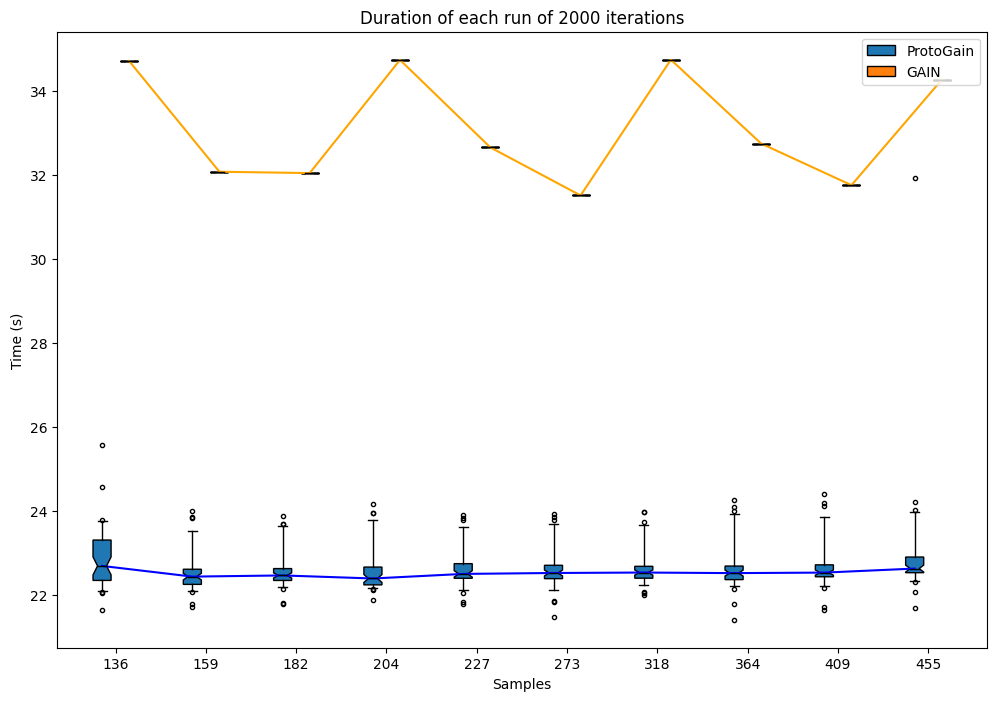

In [4]:
# Boxplot of the time of each run

my_time_values = {}
gain_time_values = {}


my_time_values = dict(reversed(list(my_run_time.items())))
nb_groups = len(my_time_values)
space = 0.15
fig, ax = plt.subplots(figsize=(12, 8))

box_param = dict(
    whis=(5, 95),
    widths=0.2,
    patch_artist=True,
    flierprops=dict(marker=".", markeredgecolor="black", fillstyle=None),
    notch=True,
    medianprops=dict(color="black"),
)


bp1 = ax.boxplot(
    my_time_values.values(),
    positions=np.arange(nb_groups) - space,
    boxprops=dict(facecolor="tab:blue"),
    **box_param,
)

X = []
Y = []
for m in bp1["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="blue")


################################# GAIN ############################################

gain_time_values = dict(reversed(list(gain_run_time.items())))

# ax[1] = ax1.twinx()
bp2 = ax.boxplot(
    gain_time_values.values(),
    positions=np.arange(nb_groups) + space,
    boxprops=dict(facecolor="tab:orange"),
    **box_param,
)
# ax.set_xticklabels(mse_values.keys())

X = []
Y = []
for m in bp2["medians"]:
    [[x0, x1], [y0, y1]] = m.get_data()
    X.append(np.mean((x0, x1)))
    Y.append(np.mean((y0, y1)))
ax.plot(X, Y, c="orange")


ax.set_xlabel("Samples")
ax.set_ylabel("Time (s)")
ax.set_title(f"Duration of each run of {params.num_epochs} iterations")
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ["ProtoGain", "GAIN"], loc="upper right")

ax.set_xticks(np.arange(nb_groups))
ax.set_xticklabels([f"{key}" for key in gain_mse_values.keys()])


# mean_run_time = np.zeros(len(train_samples))
# std_run_time = np.zeros(len(train_samples))

# fig = plt.figure()

# plt.boxplot(my_run_time.values(), notch=True)
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.xticks(range(1, len(my_run_time) + 1), my_run_time.keys())
# plt.title("My Gain - Time of each run My Gain")


# fig1 = plt.figure()

# for i, samples in enumerate(train_samples):
#     mean_run_time[i] = my_run_time[samples].mean()
#     std_run_time[i] = my_run_time[samples].std()

# mean_run_time = mean_run_time[::-1]
# std_run_time = std_run_time[::-1]

# plt.plot(train_samples, mean_run_time, "o-", markersize=7)
# plt.fill_between(
#     np.arange(1, len(mean_run_time) + 1, 1),
#     mean_run_time + std_run_time,
#     mean_run_time - std_run_time,
#     alpha=0.4,
# )
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.title("My Gain - Time of each run My Gain")
# plt.legend()

# #########################################################################
# mean_run_time = np.zeros(len(train_samples))
# std_run_time = np.zeros(len(train_samples))

# fig = plt.figure()

# plt.boxplot(gain_run_time.values(), notch=True)
# plt.xlabel("Nº Samples")
# plt.ylabel("Time (s)")
# plt.xticks(range(1, len(gain_run_time) + 1), gain_run_time.keys())
# plt.title("GAIN - Time of each run My Gain")


# fig1 = plt.figure()

# for i, samples in enumerate(train_samples):
#     mean_run_time[i] = gain_run_time[samples].mean()
#     std_run_time[i] = gain_run_time[samples].std()

# mean_run_time = mean_run_time[::-1]
# std_run_time = std_run_time[::-1]

# plt.plot(train_samples, mean_run_time, "o-", markersize=7)
# plt.fill_between(
#     np.arange(1, len(mean_run_time) + 1, 1),
#     mean_run_time + std_run_time,
#     mean_run_time - std_run_time,
#     alpha=0.4,
# )
# plt.xlabel("Samples")
# plt.ylabel("Time (s)")
# plt.title("GAIN - Time of each run My Gain")
# plt.legend()


print(my_time_values)
# for tick, samples in enumerate(gain_mse_values.keys()):
#     res = ttest_ind(my_time_values[samples], gain_time_values[samples])
#     x = tick
#     y = 0.007

#     # Draw the square
#     ax.add_patch(plt.Rectangle((x - 0.4, y-0.00008), 0.8, 0.0005, color="grey", alpha = 0.4))

#     # Add the res value inside the square
#     ax.text(x, y, str(round(res.pvalue,4)), color="chocolate", ha="center", va="center", weight='bold')
#     ax.text(x, y+0.00025, str(round(res.statistic,4)), color="g", ha="center", va="center", weight='bold')

ValueError: x and y must have same first dimension, but have shapes (20,) and (30, 1)

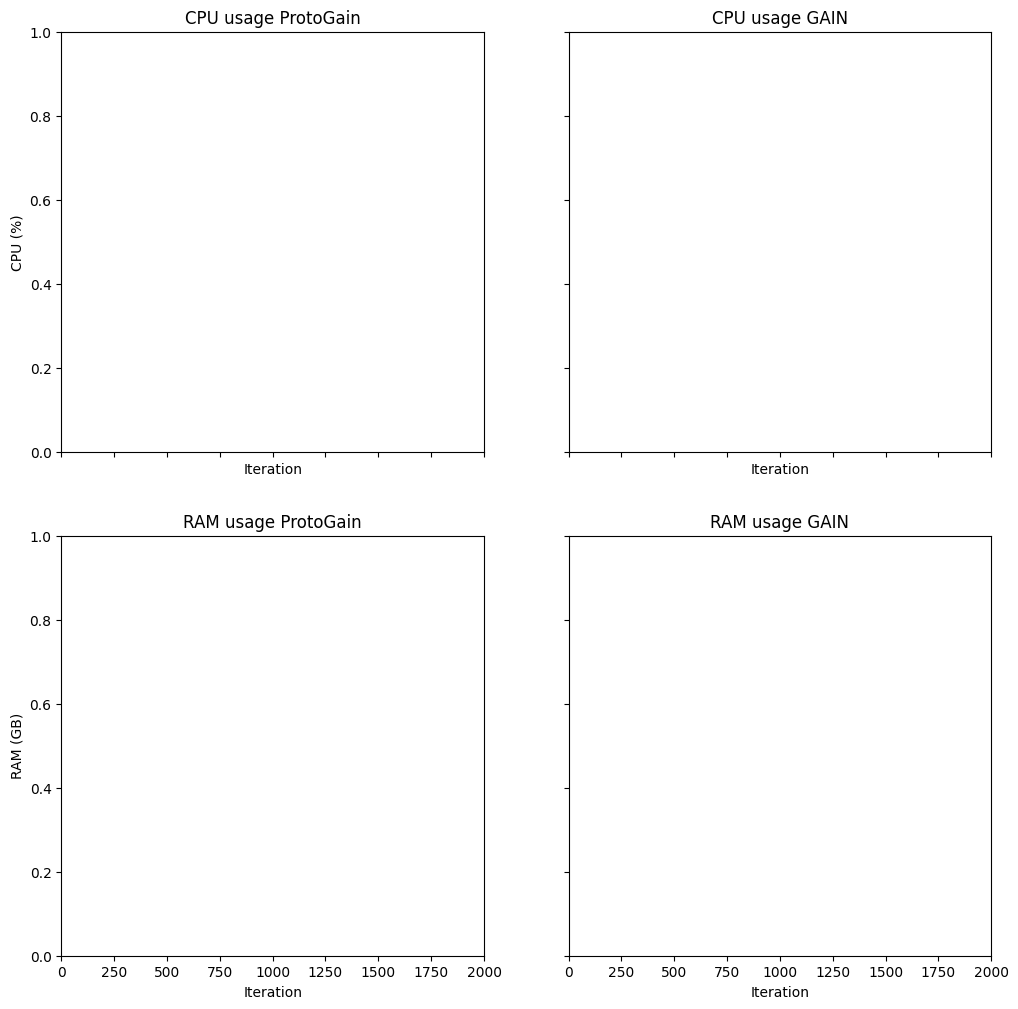

In [113]:
# CPU and RAM

xmax = params.num_epochs

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey="row")

# Set the labels and limits for Loss D
axs[0, 0].set_xlabel("Iteration")
axs[0, 0].set_ylabel("CPU (%)")
axs[0, 0].set_xlim(0, xmax)
axs[0, 0].set_title(f"CPU usage ProtoGain")

# Set the labels and limits for Loss G
axs[0, 1].set_xlabel("Iteration")
axs[0, 1].set_title(f"CPU usage GAIN")


axs[1, 0].set_xlabel("Iteration")
axs[1, 0].set_ylabel("RAM (GB)")
axs[1, 0].set_title(f"RAM usage ProtoGain")
axs[1, 1].set_xlabel("Iteration")
axs[1, 1].set_title(f"RAM usage GAIN")


x_ticks = range(0, xmax, 100)


# Create a color gradient based on the loop index
colors = np.linspace(0, 1, len(train_samples))

for i, samples in enumerate(train_samples):
    runs_cpu = {run: data for (s, run), data in my_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot
    axs[0, 0].plot(
        x_ticks, mean_runs_cpu, label=f"{samples} samples", c=plt.cm.viridis(colors[i])
    )
    axs[0, 0].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 0].xaxis.grid(True, which="major")
    axs[0, 0].yaxis.grid(True, which="major")

    runs_cpu = {run: data for (s, run), data in gain_cpu.items() if s == samples}
    runs_cpu_array = np.array(list(runs_cpu.values()))
    mean_runs_cpu = np.mean(runs_cpu_array, axis=0)
    std_runs_cpu = np.std(runs_cpu_array, axis=0)

    # Use the color gradient for the plot

    axs[0, 1].plot(x_ticks, mean_runs_cpu, c=plt.cm.viridis(colors[i]))
    axs[0, 1].fill_between(
        np.arange(1, len(mean_runs_cpu) + 1, 1),
        mean_runs_cpu[:, 0] + std_runs_cpu[:, 0],
        mean_runs_cpu[:, 0] - std_runs_cpu[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[0, 1].xaxis.grid(True, which="major")
    axs[0, 1].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in my_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 0].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 0].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 0].xaxis.grid(True, which="major")
    axs[1, 0].yaxis.grid(True, which="major")

    runs_ram = {run: data for (s, run), data in gain_ram.items() if s == samples}
    runs_ram_array = np.array(list(runs_ram.values()))
    mean_runs_ram = np.mean(runs_ram_array, axis=0)
    std_runs_ram = np.std(runs_ram_array, axis=0)

    axs[1, 1].plot(x_ticks, mean_runs_ram, c=plt.cm.viridis(colors[i]))
    axs[1, 1].fill_between(
        np.arange(1, len(mean_runs_ram) + 1, 1),
        mean_runs_ram[:, 0] + std_runs_ram[:, 0],
        mean_runs_ram[:, 0] - std_runs_ram[:, 0],
        alpha=0.4,
        color=plt.cm.viridis(colors[i]),
    )
    axs[1, 1].xaxis.grid(True, which="major")
    axs[1, 1].yaxis.grid(True, which="major")


fig.legend(loc="center right", bbox_to_anchor=(1.05, 0.5))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Show the plot
plt.show()